# Notebook Modelo 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import pickle


## Importando datasets



#### Datasets Tratados

In [2]:
data_train = pd.read_csv('./../datasets/df_train.csv')
data_test = pd.read_csv('./../datasets/df_test.csv')

In [3]:
data_test.head()

,age,education,capital_gain,capital_loss,hours_per_week,status_civic,target
0,25,7,0,0,40,1,0
1,38,9,0,0,50,0,0
2,28,12,0,0,40,0,1
3,44,10,7688,0,40,0,1
4,34,6,0,0,30,1,0


#### Datasets Normalizados

In [4]:
data_train_norm = pd.read_csv('./../datasets/train_normalize.csv')
data_test_norm = pd.read_csv('./../datasets/test_normalize.csv')

### Informação Importante
O dataset de treino sofre de um desbalanceamento muito grande.
Veja o gráfico abaixo:




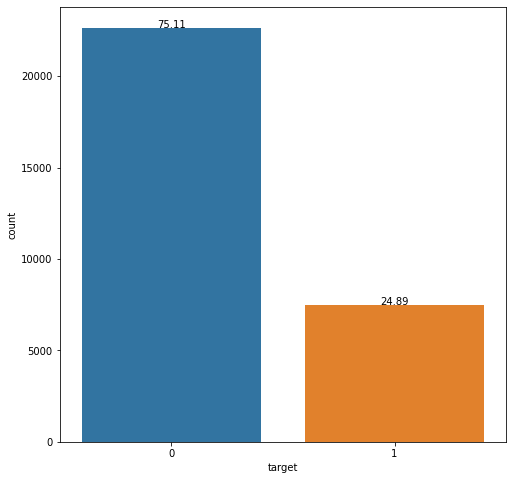

In [6]:
plt.figure(figsize=(8,8))
total = float(len(data_train) )

ax = sns.countplot(x="target", data=data_train)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format((height/total)*100),ha="center") 
    
plt.show()

In [9]:
def plot_cm(y_true, y_pred, figsize=(6,6)):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
    ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
    sns.heatmap(cm, cmap= "YlGnBu", annot=annot, fmt='', ax=ax)

# Explicando o fluxo

Faremos o treinamento de cada algoritmo, para este notebook será usado Support Vector Machine (SVM), da seguinte forma:

1. Treina-se com os datasets desbalanceados:
    - Aplicado a datasets com tratamento dos dados
    - Aplicado a  datasets com tratamento mais normalização



Em seguida escolheremos qual dataset irá prosseguir para próxima etapa, a qual tem como objetivo resolver a questão do desbalanceamento. Para isto iremos aplicar os métodos under, over sampling e a junção dos dois metódos. Os resultados, serão avaliados, dos quais iremos avaliar os seguintes paramêtros: accuracia e a recall de cada classe em especial a classe 1.

Para além disso, a matriz será um paramêtro de escolha. Pois é preferível que tenhamos mais falso positivo do que falso negativo. Isso quer dizer que, melhor classificarmos que irá ganhar menor ou igual a 50k por ano em relação a situação contrária. No entanto, vale ressaltar que não devemos esquecer a accuracia e a recall de cada classe nessa decisão.

     
     
   

# 1 Treina-se com os dataset desbalanceado:

In [8]:
def trainModel(df_train,df_test, model,result):
    X_train, X_test = df_train.drop("target", axis = 1),df_test.drop("target", axis = 1)
    y_train, y_test = df_train.target,df_test.target
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Resultados do ', result)
    print('Acurácia:\n', acc)
    print('Report dos parametros:\n')
    print (classification_report(y_test, y_pred))
    print('Matriz de confusão:\n')
    plot_cm(y_test, y_pred)

#### Datasets Tratado

Resultados do  Dataset com tratamento dos dados.
Acurácia:
 0.7964143426294821
Report dos parametros:

              precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

Matriz de confusão:



<ipython-input-7-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-7-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


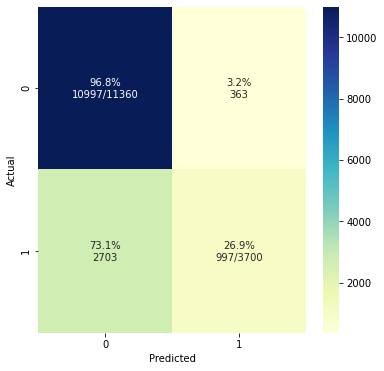

In [9]:
result = 'Dataset com tratamento dos dados.'
model = svm.SVC()
trainModel(data_train,data_test, model, result)

#### Datasets Normalizado

Resultados do  Dataset com tratamento dos dados e normalização.
Acurácia:
 0.8431606905710491
Report dos parametros:

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     11360
           1       0.75      0.55      0.63      3700

    accuracy                           0.84     15060
   macro avg       0.81      0.74      0.77     15060
weighted avg       0.84      0.84      0.83     15060

Matriz de confusão:



<ipython-input-7-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-7-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


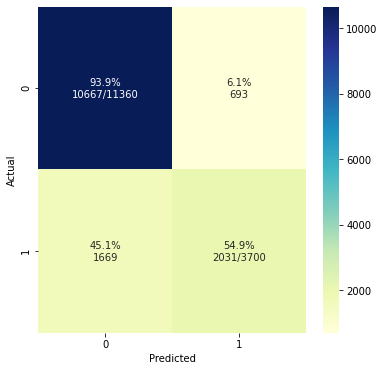

In [10]:
result = 'Dataset com tratamento dos dados e normalização.'
model = svm.SVC()
trainModel(data_train_norm,data_test_norm, model, result)

# Comparação

|     Logistic regression| Accuracy | Precision | Precision | Recall   | Recall   | Matriz | Matriz|           
|:-----------:           |:--------:|:--------:|:---------:|:---------:|:--------:|:---------:|:--------:|
|                        |          | classe 0  | classe 1 |  classe 0 | classe 1 |  FP       | FN        
|    Dataset tratado     |  0.7964  |     0.80  |    0.73  |    0.97   | 0.27     | 0.032     | 0.731
|    Dataset normalizado |  0.8431  |     0.86  |    0.75  |    0.94   | 0.55     | 0.061     | 0.451


#### Decisão qual dataset usar :

Mediante aos resultados acima podemos ver que dataset normalizado atende aos critérios que definimos para escolher o melhor algoritmo. Desta forma, vamos adotar nos proximos modelos os datasets normalizados e concomitantemente iremos aplicar métodos para otimizar os resuldos uma vez que o dataset encontra-se desbalanceado.

Iremos adotar os seguintes métodos 

 1. **O método de Over Sampling:**

   - Aumenta-se a classe minoritária com dados sinteticos, para se igualar a classe majoritária.
   
    
2. **O método de Under Sampling:**
     
     - Diminui-se a classe  majoritária deletando dados desta, para ela se igualar a classe minoritária.
     
     
3. **O método da Equipa 9:**
    
    - Esse método é resultado da combinação dos dois métodos anteriores.



### 1 - Over Sampling

In [11]:
def trainMethodOver(df_train,df_test, model):
    X = df_train.drop("target", axis = 1)
    y = df_train.target
    smt = SMOTE()
    X, y = smt.fit_sample(X, y)
    print('Base de dados')
    ax = sns.countplot(x=y)
    X_train, X_test = X,df_test.drop("target", axis = 1)
    y_train, y_test = y,df_test.target
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Acurácia:\n', acc)
    print('Report dos parametros:\n')
    print (classification_report(y_test, y_pred))
    print('Matriz de confusão:\n')
    plot_cm(y_test, y_pred)

Base de dados
Acurácia:
 0.7761620185922975
Report dos parametros:

              precision    recall  f1-score   support

           0       0.95      0.74      0.83     11360
           1       0.53      0.88      0.66      3700

    accuracy                           0.78     15060
   macro avg       0.74      0.81      0.75     15060
weighted avg       0.85      0.78      0.79     15060

Matriz de confusão:



<ipython-input-7-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-7-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


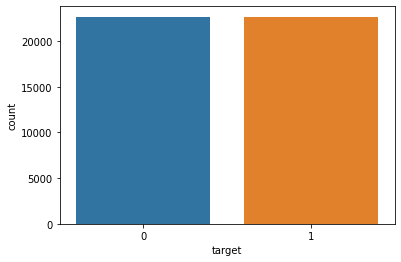

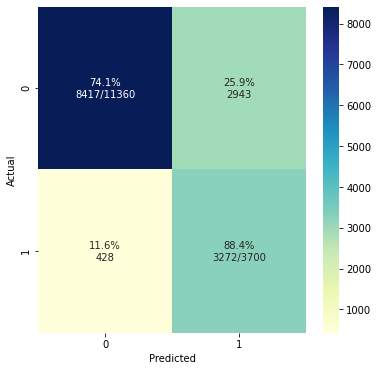

In [12]:
modelOver = svm.SVC()
trainMethodOver(data_train_norm,data_test_norm, modelOver)

A recall da classe 1 superou a classe 0, no entanto com a geração dos dados sinteticos da classe 1 podemos está produzindo um viés no modelo para classe 1. 

## 2 - Under Sampling

In [13]:
def trainMethodUnder(df_train,df_test, model):
    X = df_train.drop("target", axis = 1)
    y = df_train.target
    nr = NearMiss()
    X, y = nr.fit_sample(X, y)
    ax = sns.countplot(x=y)
    X_train, X_test = X,df_test.drop("target", axis = 1)
    y_train, y_test = y,df_test.target
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Acurácia:\n', acc)
    print('Report dos parametros:\n')
    print (classification_report(y_test, y_pred))
    print('Matriz de confusão:\n')
    plot_cm(y_test, y_pred)

Acurácia:
 0.6800796812749004
Report dos parametros:

              precision    recall  f1-score   support

           0       0.86      0.69      0.76     11360
           1       0.41      0.65      0.50      3700

    accuracy                           0.68     15060
   macro avg       0.63      0.67      0.63     15060
weighted avg       0.75      0.68      0.70     15060

Matriz de confusão:



<ipython-input-7-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-7-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


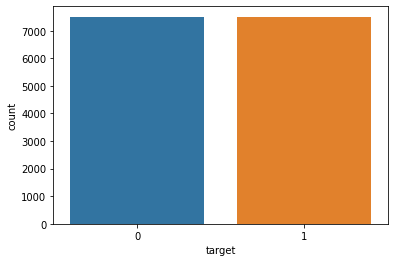

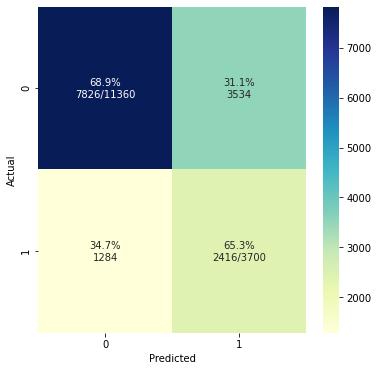

In [14]:
modelUnder = svm.SVC()
trainMethodUnder(data_train_norm,data_test_norm, modelUnder)

Aqui apesar da accuraria ser muito baixa em relação ao odelo anterior, parece que tem menos vies.

## 3 - Método Equipa 9

In [10]:
def trainMethodTeam(df_train,df_test, model):
    X = df_train.drop("target", axis = 1)
    y = df_train.target
    ratio= np.bincount(data_train_norm.target)
    ratiot = ratio[0]/ratio[1]
 
    
    
    
    over = SMOTE(sampling_strategy=0.5,random_state=10)
    X, y = over.fit_sample(X, y)
    under =  RandomUnderSampler(sampling_strategy=0.8)
   
    X, y = under.fit_sample(X, y)
    print(np.bincount(y))
    
    
   
    print('Base de dados')
    ax = sns.countplot(x=y)
    X_train, X_test = X,df_test.drop("target", axis = 1)
    y_train, y_test = y,df_test.target
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print('Acurácia:\n', acc)
    print('Report dos parametros:\n')
    print (classification_report(y_test, y_pred))
    print('Matriz de confusão:\n')
    plot_cm(y_test, y_pred)

[14158 11327]
Base de dados
Acurácia:
 0.7933598937583002
Report dos parametros:

              precision    recall  f1-score   support

           0       0.94      0.78      0.85     11360
           1       0.55      0.84      0.67      3700

    accuracy                           0.79     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.84      0.79      0.81     15060

Matriz de confusão:



<ipython-input-9-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-9-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


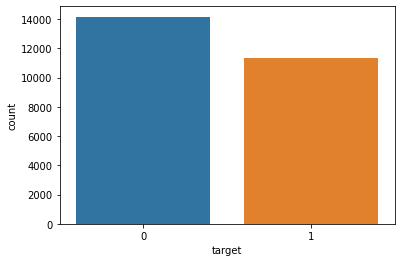

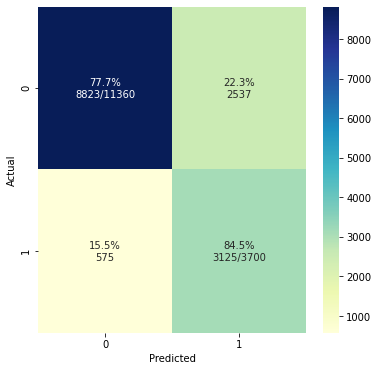

In [11]:
modelTeam =  svm.SVC()
trainMethodTeam(data_train_norm,data_test_norm, modelTeam)

# Resultados

Levando em consideração a accuracia e a recall bem como outros parametros como falso positivo e falso negativo, o melhor modelo para esse algoritmo aqui testado seria o ultimo modelo. Usando o método construído pela equipa 9, uma junção dos métodos under e over sampling. 

Antes de salvarmos o último modelo, iremos usar o método de otimização Gridsearch com o proposito de melhorar os resultados.

#### Gridsearch

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  

In [25]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001]}

In [26]:
modelgrid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)

[14158 11327]
Base de dados
Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................................... C=0.1, gamma=1, total=  15.7s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.7s remaining:    0.0s


[CV] ................................... C=0.1, gamma=1, total=  15.4s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  12.1s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=  10.7s
[CV] C=0.1, gamma=1 ..................................................
[CV] ................................... C=0.1, gamma=1, total=   7.6s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   8.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   8.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ................................. C=0.1, gamma=0.1, total=   8.4s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .

[CV] ................................ C=10, gamma=0.001, total=   8.4s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  14.8s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  14.3s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  14.3s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  14.1s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=  14.3s
[CV] C=100, gamma=0.1 ................................................
[CV] ................................. C=100, gamma=0.1, total=   8.3s
[CV] C=100, gamma=0.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed: 33.8min finished


Acurácia:
 0.7926958831341302
Report dos parametros:

              precision    recall  f1-score   support

           0       0.94      0.77      0.85     11360
           1       0.55      0.86      0.67      3700

    accuracy                           0.79     15060
   macro avg       0.75      0.81      0.76     15060
weighted avg       0.85      0.79      0.80     15060

Matriz de confusão:



<ipython-input-7-d4a32cf3cb7c>:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.xaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])
<ipython-input-7-d4a32cf3cb7c>:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.yaxis.set_ticklabels(['<=50K/Y', '>50K/Y'])


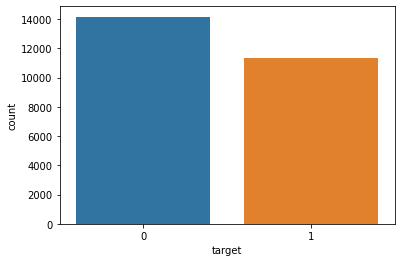

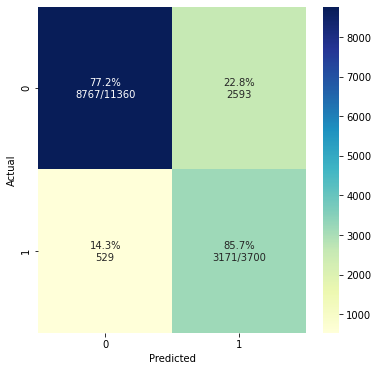

In [30]:
trainMethodTeam(data_train_norm,data_test_norm, modelgrid)

In [28]:
modelgrid.best_estimator_

SVC(C=100, gamma=1)

### Conclusão
O processo de otimização aumentou muito pouco decidimos optar pelo modelo anterior desta forma iremos guardar esse modelo.

In [12]:
pickle.dump(modelTeam, open('modeloSVM.pkl', 'wb'))